In [ ]:
-*!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import copy
import re

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from collections import Counter
import warnings

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

In [ ]:
# 나눔고딕 폰트 경로 설정
# plt.rc('font', family='NanumGothic')

file_path = '/content/traum077045@gmail.com/MyDrive/Colab Notebooks/'

# 데이터 EDA 진행
data = pd.read_csv(file_path +'total_webtoon_data(2).csv')
train_data = data[pd.notna(data['Category_Tag'])]

# DataFrame 복사
df = copy.deepcopy(train_data)

text = df[['Summary','Category_Tag']]

In [ ]:
# 각 카테고리의 수를 세기 위한 Counter 초기화
category_count = Counter()

# 각 라인의 'Category_Tag' 값을 콤마로 분리하고 카운트
for i in text['Category_Tag']:
    categories = [category.strip() for category in i.split(',')]  # 각 카테고리에서 공백 제거
    category_count.update(categories)

# 결과 출력
print(category_count)

Counter({'드라마': 688, '판타지': 520, '멜로/로맨스': 392, '사랑': 286, '액션': 190, '모험': 158, '성숙': 130, '도전': 124, 'SF': 122, '스릴러': 111, '제자/학생': 100, '카리스마있음': 98, '로맨스판타지': 94, '소년영웅': 92, '코미디': 92, '회사원': 87, '구출': 82, '고아': 80, '성장물': 67, '로맨틱코미디': 61, '짝사랑': 60, '삼각관계': 59, '능력녀': 57, '갑작스런사고': 56, '거지': 54, '미스터리': 52, '미인': 51, '현대로맨스': 48, '금지된사랑': 48, '힐링물': 45, '왕족/귀족': 44, '달달물': 44, '황족(왕족)': 44, '추구': 44, '다정남': 43, '몰락한귀족': 42, '능력남': 41, '이야기중심': 41, '복수': 39, '발견': 38, '강제된과업': 38, '현대물': 37, '운명': 36, '뜻밖의초능력': 36, '성장': 35, 'CEO(사장/회장)': 34, '첫사랑': 31, '빙의물': 30, '엉뚱발랄녀': 30, '까칠남': 30, '라이벌': 30, '첫눈에반한사랑': 30, '먼치킨': 29, '계약관계': 28, '남장/여장': 28, '신분위장': 28, '아픈기억이있음': 28, '순진함': 28, '낯선곳으로의이주': 28, '천재': 26, '순정남': 26, '대전격투': 26, '수수께끼': 26, '걸크러쉬': 25, '능글남': 24, '외유내강': 24, '귀여운': 24, '탈옥': 24, '먼치킨/천재': 24, '계급을초월한사랑': 24, '상처녀': 23, '여주판타지': 23, '학원물': 22, '학생': 22, '감금': 22, '횡재': 22, '세대를초월한우정': 22, '퓨전': 21, '털털녀': 21, '전쟁': 21, '가족': 21, '일상물': 20, '친구': 20, '탈출': 20

In [ ]:
# 각 카테고리에 대한 빈도를 리스트로 저장
categories = list(category_count.keys())
category_frequencies = [category_count[c] for c in categories]

# K-평균 군집화
n_clusters = min(len(category_frequencies), 4)  # 군집의 개수를 적절히 조절
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(np.array(category_frequencies).reshape(-1, 1))

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=1)
X_pca = pca.fit_transform(np.array(category_frequencies).reshape(-1, 1))

# 군집화 결과를 DataFrame으로 저장
category_df = pd.DataFrame({'category': categories, 'cluster': labels, 'PCA1': X_pca.flatten()})

# 군집화 결과 출력
for cluster_id in range(n_clusters):
    cluster_categories = category_df[category_df['cluster'] == cluster_id]['category'].tolist()
    print(f'Cluster {cluster_id + 1}: {cluster_categories}')


Cluster 1: ['복수', '귀환', '먼치킨', '천재', '고인물', '이능력', '정통', '환생', '빙의', '회귀', '마검사', '마법사', '신', '검사', '왕족/귀족', '영웅/신화', '빙의물', '피폐물', '순정남', '조신남', '무심녀', '악녀', '현대로맨스', '오해물', '동거물', '첫사랑', '상처남', '계략남', '순정녀', '까칠녀', '상처녀', '짝사랑녀', '계약관계', '금단의관계', '힐링물', '육아', '무림', '낭인', '학원물', '막장', '츤데레남', '다정남', '평범녀', '친구>연인', '라이벌/앙숙', '환생물', '능글남', '외유내강', '가족물', '초월적존재', '소유욕/독점욕', '직진남', '걸크러쉬', '사제지간', '절륜남', '퓨전', '노력', '성장', '게임', '차원이동', '생존', '아포칼립스', '플레이어', '타임슬립', '중세물', '운명', '애교남', '대형견남', '능력남', '엉뚱발랄녀', '자상녀', '애교녀', '치유물', '달달물', '신분차이', '잔잔물', '여주판타지', '우연한만남', '회귀물', '복수물', '연하남', '짝사랑남', '소꿉친구', '권선징악', '육아물', '바람둥이', '나이차커플', '동양풍', '일상물', '일상', '동물', '귀여운', '이야기중심', '잔잔한', '존댓말남', '순진녀', '까칠남', '차도남', '오빠', '집착남', '다정녀', '차원이동물', '시한부', '쌍방삽질', '역하렘', '능글녀', '유혹남', '털털녀', '개그물', '연예계물', '직진녀', '경쟁구도', '오피스물', '재벌남', '계략', '귀염', '사랑꾼', '집착', '후회', '강한', '도망', '소유욕', '질투', '재벌녀', '사이다녀', '우월녀', '조력자', '전쟁', '무공', '서포터', '사이다남', '갑을관계', '영혼체인지', '냉정남', '뇌섹녀', '철벽녀', '철벽남', '시스템

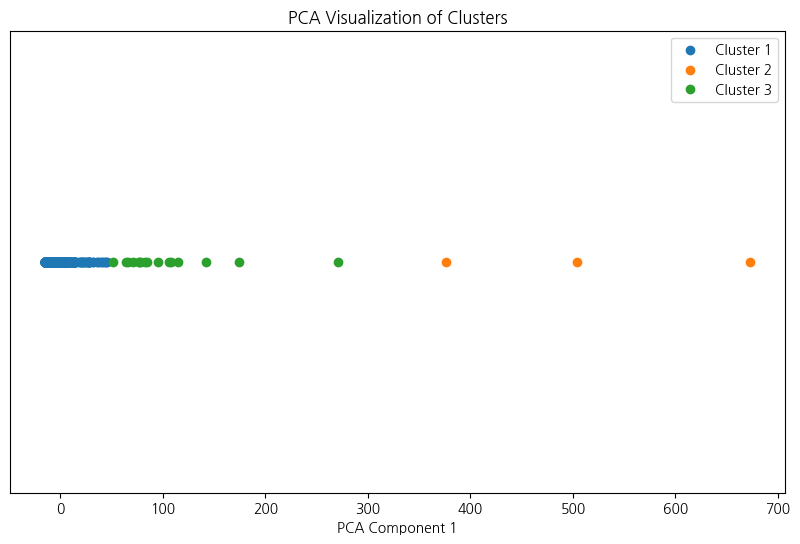

In [ ]:
# PCA 결과 시각화
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    cluster_data = category_df[category_df['cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], [0] * len(cluster_data), label=f'Cluster {cluster_id + 1}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.yticks([])  # y축 표시 제거
plt.legend()
plt.show()


# PCA

In [ ]:
from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer
import matplotlib.pyplot as plt

import torch


In [ ]:
# PCA 모델 초기화
pca = PCA(n_components=2)

# KoBERT 모델과 토크나이저 불러오기
model = BertModel.from_pretrained("monologg/kobert")
tokenizer = BertTokenizer.from_pretrained("monologg/kobert")

# 입력 데이터를 문장 형태로 만들기 (예: 리스트의 각 원소가 문장)
sentences = categories

# 각 문장을 KoBERT로 임베딩
embeddings = []
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy())

# 임베딩된 벡터를 NumPy 배열로 변환
customer_X_kobert = np.array(embeddings)

# PCA를 적용
pca_result = pca.fit_transform(customer_X_kobert)

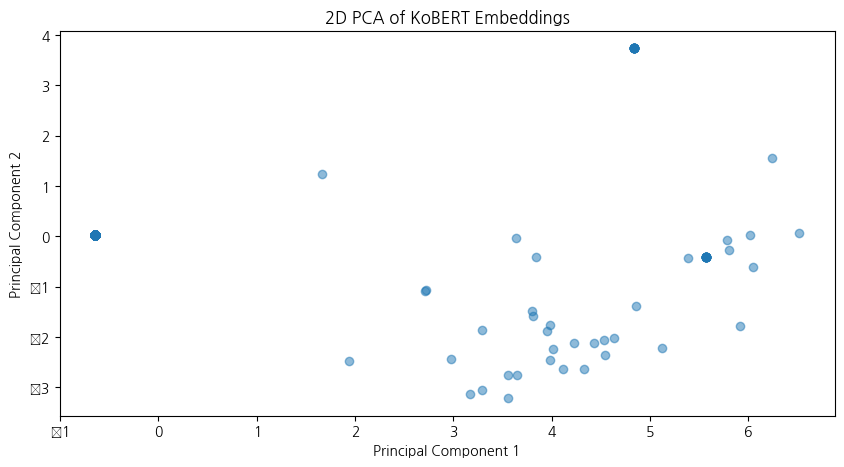

In [ ]:
# PCA 결과를 데이터프레임으로 변환 (옵션)
# 이 부분은 필수는 아니지만, 데이터의 관계를 더 쉽게 이해할 수 있습니다.

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# 시각화
plt.figure(figsize=(10, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('2D PCA of KoBERT Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
